In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Loading the necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from bokeh.core.properties import value
from bokeh.io import show, output_notebook
from bokeh.plotting import *
from bokeh.models import ColumnDataSource, FactorRange, Legend#, LabelSet
from bokeh.palettes import Spectral6, Spectral8, Category20, Spectral3
from bokeh.transform import factor_cmap
output_notebook()

#read in datasets 
cust = pd.read_csv('custody_ML.csv')
shoot = pd.read_csv('shootings_ML.csv')

Loading BokehJS ...

In [2]:
cust.head()

,Unnamed: 0,custody_type,race,death_type,age
0,0,2,4,5,58.0
1,1,2,3,5,76.0
2,2,1,4,6,30.0
3,3,2,1,1,39.0
4,4,2,1,5,31.0


In [3]:
shoot.head()

,Unnamed: 0,age,fatality,armed,race,mult_officers
0,103,26.0,0,2,4,0
1,104,16.0,0,2,2,0
2,105,26.0,0,2,0,1
3,106,35.0,0,0,4,0
4,107,30.0,0,2,2,0


In [4]:
cust.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
shoot.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
#Scale cust df
X_col = cust.columns

cust_scaled = pd.DataFrame(StandardScaler().fit_transform(cust), columns= X_col)
cust_scaled.head()

,custody_type,race,death_type,age
0,0.123491,1.156565,0.155584,0.590814
1,0.123491,0.406515,0.155584,1.798521
2,-1.037655,1.156565,0.943599,-1.287842
3,0.123491,-1.093584,-2.996475,-0.683988
4,0.123491,-1.093584,0.155584,-1.220747


In [7]:
#Scale shoot df
X_cols = shoot.columns

shoot_scaled = pd.DataFrame(StandardScaler().fit_transform(shoot), columns = X_cols)
shoot_scaled.head()

,age,fatality,armed,race,mult_officers
0,-0.670348,-1.387608,0.980761,1.548471,-0.591786
1,-1.716530,-1.387608,0.980761,-0.096378,-0.591786
2,-0.670348,-1.387608,0.980761,-1.741227,1.689799
3,0.271215,-1.387608,-1.040776,1.548471,-0.591786
4,-0.251876,-1.387608,0.980761,-0.096378,-0.591786


# Deaths in Custody

## KMeans Clustering

In [8]:
#KMeans Clustering of Custody data
k_range = range(2,11)

for i in k_range:
    model = KMeans(n_clusters=i,random_state=11)
    pred =model.fit_predict(cust_scaled)
    silhouette_avg = silhouette_score(cust_scaled,pred)
    print('The number of clusters, %d, and silhouette coefficient is %0.2f'% (i,silhouette_avg))

The number of clusters, 2, and silhouette coefficient is 0.38
The number of clusters, 3, and silhouette coefficient is 0.35
The number of clusters, 4, and silhouette coefficient is 0.40
The number of clusters, 5, and silhouette coefficient is 0.41
The number of clusters, 6, and silhouette coefficient is 0.43
The number of clusters, 7, and silhouette coefficient is 0.44
The number of clusters, 8, and silhouette coefficient is 0.39
The number of clusters, 9, and silhouette coefficient is 0.40
The number of clusters, 10, and silhouette coefficient is 0.40


## Spectral Clustering

In [9]:
# Spectral clustering
for k in range(2,11):
    spect = SpectralClustering(n_clusters=k,random_state=11)
    spect.fit_predict(cust_scaled)
    spectlabel = spect.labels_
    score= silhouette_score(cust_scaled, spectlabel, metric='euclidean')
    print("The number of clusters: %d, silhouette coefficient: %0.2f" % (k,score))

The number of clusters: 2, silhouette coefficient: 0.20
The number of clusters: 3, silhouette coefficient: 0.27
The number of clusters: 4, silhouette coefficient: 0.29
The number of clusters: 5, silhouette coefficient: 0.13
The number of clusters: 6, silhouette coefficient: 0.25
The number of clusters: 7, silhouette coefficient: 0.26
The number of clusters: 8, silhouette coefficient: 0.29
The number of clusters: 9, silhouette coefficient: 0.22
The number of clusters: 10, silhouette coefficient: 0.23


#### Tuning

In [10]:
gam = [0.001, 0.01, 0.1, 0.25, 0.5, 1.0]

for g in gam:
    for k in range(2,11):
        spect = SpectralClustering(n_clusters=k, random_state=11, n_jobs =-1, gamma= g)
        spect.fit_predict(cust_scaled)
        spectlabel = spect.labels_
        score= silhouette_score(cust_scaled, spectlabel, metric='euclidean')
        print("The number of clusters: %d, gamma: %f, silhouette coefficient: %0.2f" % (k,g,score))

The number of clusters: 2, gamma: 0.001000, silhouette coefficient: 0.36
The number of clusters: 3, gamma: 0.001000, silhouette coefficient: 0.29
The number of clusters: 4, gamma: 0.001000, silhouette coefficient: 0.37
The number of clusters: 5, gamma: 0.001000, silhouette coefficient: 0.41
The number of clusters: 6, gamma: 0.001000, silhouette coefficient: 0.40
The number of clusters: 7, gamma: 0.001000, silhouette coefficient: 0.43
The number of clusters: 8, gamma: 0.001000, silhouette coefficient: 0.45
The number of clusters: 9, gamma: 0.001000, silhouette coefficient: 0.37
The number of clusters: 10, gamma: 0.001000, silhouette coefficient: 0.34
The number of clusters: 2, gamma: 0.010000, silhouette coefficient: 0.36
The number of clusters: 3, gamma: 0.010000, silhouette coefficient: 0.29
The number of clusters: 4, gamma: 0.010000, silhouette coefficient: 0.37
The number of clusters: 5, gamma: 0.010000, silhouette coefficient: 0.41
The number of clusters: 6, gamma: 0.010000, silhou

## Agglomerative

In [11]:
# Agglomerative Clustering with 2-10 clusters 
for k in range(2,11):
    agg = AgglomerativeClustering(n_clusters=k)
    agg.fit_predict(cust_scaled)
    labels = agg.labels_
    score= silhouette_score(cust_scaled, labels, metric='euclidean')
    print("The number of clusters: %d, silhouette coefficient: %0.2f" % (k,score))

The number of clusters: 2, silhouette coefficient: 0.38
The number of clusters: 3, silhouette coefficient: 0.39
The number of clusters: 4, silhouette coefficient: 0.40
The number of clusters: 5, silhouette coefficient: 0.36
The number of clusters: 6, silhouette coefficient: 0.38
The number of clusters: 7, silhouette coefficient: 0.36
The number of clusters: 8, silhouette coefficient: 0.38
The number of clusters: 9, silhouette coefficient: 0.39
The number of clusters: 10, silhouette coefficient: 0.39


## DBScan

In [12]:
db = DBSCAN()
db.fit_predict(cust_scaled)
labels = db.labels_
score= silhouette_score(cust_scaled, labels, metric='euclidean')
print("Silhouette Coefficient: %0.3f"% silhouette_score(cust_scaled, labels, metric='euclidean'))

Silhouette Coefficient: 0.204


#### Tuning

In [13]:
ep = [0.25, 0.5, 0.75, 1, 1.5] #only clustered into one group at 2
minsamp = [3, 4, 5, 6]

for e in ep:
    for m in minsamp:
        db = DBSCAN(eps=e, min_samples=m, n_jobs=-1)
        db.fit_predict(cust_scaled)
        labels = db.labels_
        print("eps = ", e, "min_samples = ", m)
        print("Silhouette Coefficient: %0.3f"% silhouette_score(cust_scaled, labels, metric='euclidean'))

eps =  0.25 min_samples =  3
Silhouette Coefficient: 0.085
eps =  0.25 min_samples =  4
Silhouette Coefficient: 0.102
eps =  0.25 min_samples =  5
Silhouette Coefficient: 0.116
eps =  0.25 min_samples =  6
Silhouette Coefficient: 0.202
eps =  0.5 min_samples =  3
Silhouette Coefficient: 0.187
eps =  0.5 min_samples =  4
Silhouette Coefficient: 0.237
eps =  0.5 min_samples =  5
Silhouette Coefficient: 0.204
eps =  0.5 min_samples =  6
Silhouette Coefficient: 0.135
eps =  0.75 min_samples =  3
Silhouette Coefficient: 0.222
eps =  0.75 min_samples =  4
Silhouette Coefficient: 0.256
eps =  0.75 min_samples =  5
Silhouette Coefficient: 0.255
eps =  0.75 min_samples =  6
Silhouette Coefficient: 0.257
eps =  1 min_samples =  3
Silhouette Coefficient: 0.225
eps =  1 min_samples =  4
Silhouette Coefficient: 0.225
eps =  1 min_samples =  5
Silhouette Coefficient: 0.225
eps =  1 min_samples =  6
Silhouette Coefficient: 0.237
eps =  1.5 min_samples =  3
Silhouette Coefficient: 0.307
eps =  1.5 min

# Officer Involved Shootings

## Kmeans 

In [14]:
#KMeans Clustering of Custody data
k_range = range(2,11)

for i in k_range:
    model = KMeans(n_clusters=i,random_state=11)
    pred =model.fit_predict(shoot_scaled)
    silhouette_avg = silhouette_score(shoot_scaled,pred)
    print('The number of clusters, %d, and silhouette coefficient is %0.2f'% (i,silhouette_avg))

The number of clusters, 2, and silhouette coefficient is 0.27
The number of clusters, 3, and silhouette coefficient is 0.26
The number of clusters, 4, and silhouette coefficient is 0.27
The number of clusters, 5, and silhouette coefficient is 0.30
The number of clusters, 6, and silhouette coefficient is 0.33
The number of clusters, 7, and silhouette coefficient is 0.33
The number of clusters, 8, and silhouette coefficient is 0.35
The number of clusters, 9, and silhouette coefficient is 0.38
The number of clusters, 10, and silhouette coefficient is 0.38


## Spectral Clustering

In [15]:
# Spectral clustering of Shooting data

for k in range(2,11):
    spect = SpectralClustering(n_clusters=k,random_state=11)
    spect.fit_predict(shoot_scaled)
    spectlabel = spect.labels_
    score=silhouette_score(shoot_scaled, spectlabel, metric='euclidean')
    print("The number of clusters, %d, and silhouette coefficient is %0.2f" % (k,score))

The number of clusters, 2, and silhouette coefficient is 0.13
The number of clusters, 3, and silhouette coefficient is 0.14
The number of clusters, 4, and silhouette coefficient is 0.17
The number of clusters, 5, and silhouette coefficient is 0.17
The number of clusters, 6, and silhouette coefficient is 0.21
The number of clusters, 7, and silhouette coefficient is 0.23
The number of clusters, 8, and silhouette coefficient is 0.26
The number of clusters, 9, and silhouette coefficient is 0.28
The number of clusters, 10, and silhouette coefficient is 0.29


#### Tuning 

In [16]:
gam = [0.1, 0.5, 1.0, 1.5]

for g in gam:
    for k in range(2,21):
        spect = SpectralClustering(n_clusters=k, random_state=11, n_jobs =-1, gamma= g)
        spect.fit_predict(shoot_scaled)
        spectlabel = spect.labels_
        score= silhouette_score(shoot_scaled, spectlabel, metric='euclidean')
        print("The number of clusters: %d, gamma: %f, silhouette coefficient: %0.2f" % (k,g,score))

The number of clusters: 2, gamma: 0.100000, silhouette coefficient: 0.22
The number of clusters: 3, gamma: 0.100000, silhouette coefficient: 0.21
The number of clusters: 4, gamma: 0.100000, silhouette coefficient: 0.26
The number of clusters: 5, gamma: 0.100000, silhouette coefficient: 0.29
The number of clusters: 6, gamma: 0.100000, silhouette coefficient: 0.29
The number of clusters: 7, gamma: 0.100000, silhouette coefficient: 0.29
The number of clusters: 8, gamma: 0.100000, silhouette coefficient: 0.28
The number of clusters: 9, gamma: 0.100000, silhouette coefficient: 0.35
The number of clusters: 10, gamma: 0.100000, silhouette coefficient: 0.36
The number of clusters: 11, gamma: 0.100000, silhouette coefficient: 0.40
The number of clusters: 12, gamma: 0.100000, silhouette coefficient: 0.38
The number of clusters: 13, gamma: 0.100000, silhouette coefficient: 0.41
The number of clusters: 14, gamma: 0.100000, silhouette coefficient: 0.41
The number of clusters: 15, gamma: 0.100000, s

## Agglomerative Clustering

In [17]:
# Agglomerative Clustering with 2-10 clusters 
for k in range(2,11):
    agg = AgglomerativeClustering(n_clusters=k)
    agg.fit_predict(shoot_scaled)
    labels = agg.labels_
    score= silhouette_score(shoot_scaled, labels, metric='euclidean')
    print("The number of clusters: %d, silhouette coefficient: %0.2f" % (k,score))

The number of clusters: 2, silhouette coefficient: 0.24
The number of clusters: 3, silhouette coefficient: 0.26
The number of clusters: 4, silhouette coefficient: 0.25
The number of clusters: 5, silhouette coefficient: 0.26
The number of clusters: 6, silhouette coefficient: 0.28
The number of clusters: 7, silhouette coefficient: 0.31
The number of clusters: 8, silhouette coefficient: 0.29
The number of clusters: 9, silhouette coefficient: 0.31
The number of clusters: 10, silhouette coefficient: 0.32


## DBScan

#### Tuning

In [18]:
ep = [0.1, 0.25, 0.5, 0.75, 1, 2] #groups into one cluster at 3
minsamp = [1, 2, 3, 4,5] 

for e in ep:
    for m in minsamp:
        db = DBSCAN(eps=e, min_samples=m, n_jobs=-1)
        db.fit_predict(shoot_scaled)
        labels = db.labels_
        print("eps = ", e, "min_samples = ", m)
        print("Silhouette Coefficient: %0.3f"% silhouette_score(shoot_scaled, labels, metric='euclidean'))

eps =  0.1 min_samples =  1
Silhouette Coefficient: 0.586
eps =  0.1 min_samples =  2
Silhouette Coefficient: 0.287
eps =  0.1 min_samples =  3
Silhouette Coefficient: 0.020
eps =  0.1 min_samples =  4
Silhouette Coefficient: -0.104
eps =  0.1 min_samples =  5
Silhouette Coefficient: -0.111
eps =  0.25 min_samples =  1
Silhouette Coefficient: 0.598
eps =  0.25 min_samples =  2
Silhouette Coefficient: 0.547
eps =  0.25 min_samples =  3
Silhouette Coefficient: 0.449
eps =  0.25 min_samples =  4
Silhouette Coefficient: 0.317
eps =  0.25 min_samples =  5
Silhouette Coefficient: 0.234
eps =  0.5 min_samples =  1
Silhouette Coefficient: 0.398
eps =  0.5 min_samples =  2
Silhouette Coefficient: 0.398
eps =  0.5 min_samples =  3
Silhouette Coefficient: 0.359
eps =  0.5 min_samples =  4
Silhouette Coefficient: 0.330
eps =  0.5 min_samples =  5
Silhouette Coefficient: 0.257
eps =  0.75 min_samples =  1
Silhouette Coefficient: 0.320
eps =  0.75 min_samples =  2
Silhouette Coefficient: 0.335
eps =

# Checking labels

### Deaths in Custody

In [19]:
#Kmeans
#The number of clusters, 7, and silhouette coefficient is 0.44
model = KMeans(n_clusters= 7,random_state=11)
model.fit_predict(cust_scaled)
print(model.labels_)
kmeans_cust= model.labels_

[0 0 2 ..., 6 6 0]


In [20]:
#The number of clusters: 8, gamma: 0.010000, silhouette coefficient: 0.45
spect = SpectralClustering(n_clusters=8, random_state=11, n_jobs =-1, gamma= 0.01)
spect.fit_predict(cust_scaled)
labels = spect.labels_
print(labels)
spectral_cust = labels

[7 7 7 ..., 3 3 7]


### Officer Involved Shootings

In [21]:
# Kmeans
#The number of clusters, 9, and silhouette coefficient is 0.38
model = KMeans(n_clusters= 9,random_state=11)
model.fit_predict(shoot_scaled)
print(model.labels_)
kmeans_shoot = model.labels_

[0 0 8 7 0 2 1 6 1 4 7 7 1 2 5 5 5 4 7 1 2 2 1 1 8 5 5 0 2 0 6 0 5 0 1 2 7
 7 8 6 3 7 6 1 4 3 7 6 6 5 5 8 7 6 3 4 1 3 2 8 6 1 1 3 1 1 3 0 1 1 2 0 8 5
 2 4 0 1 8 6 1 1 8 0 3 7 1 4 1 0 7 2 2 6 0 1 2 3 1 3 3 6 2 7 3 8 1 3 5 7 5
 1 4 8 2 3 7 8 3 7 6 8 7 5 3 0 0 2 7 1 7 4 8 3 3 8 6 7 6 8 3 1 3 3 3 8 3 3
 0 3 1 0 7 3 1 4 2 4 7 4 4 1 5 4 8 7 7 8 0 7 8 4 5 6 6 6 4 4 6 5 7 3 3 4 1
 7 3 1 5 5 5 6 8 0 5 0 3 7 0 5 7 1 0 4 3 7 7 8 3 4 8 1 0 4 5 8 3 4 3 3 5 4
 3 5 2 3 1 2 0 8 1 1 0 3 2 1 3 1 2 6 3 3 1 1 6 8 3 1 6 0 8 3 7 3 4 4 2 2 4
 3 4 5 2 7 3 3 3 6 5 1 3 2 3 0 7 1 1 3 1 1 5 3 1 1 6 0 2 0 3 1 7 6 3 3 3 8
 5 1 0 3 3 6 6 3 1 5 1 7 8 1 3 3 1 3 4 6 7 3 6 7 2 0 1 2 2 3 1 8 5 2 0 5 4
 7 3 1 4 1 4 4 7 3 8 1 7 1 3 1 4 0 0 6 8 0 8 5 3 3 3 6 3 3 3 1 0 1 1 0 6 1
 3 6 3 2 5 0 1 3 4 3 3 1 0 5 1 4 2 2 7 2 3 3 3 4 6 0 1 5 8 6 3 8 1 3 2 7 7
 7 4 4 6 1 1 1 6 7 7 1 5 1 6 1 4 6 4 6 4 4 3 3 2 3 4 4 4 4 5 4 5 4 0 7 7 0
 5 8 0 2 0 0 7 2 2 5 5 3 4 3 6 0 3 0 5 0 2 5 3 4 4 3 5 0 5 5 4 4 0 1 0 5 2
 4 1 4 0 0 0 3 0 0 3 3 0 

In [22]:
# Spectral
# The number of clusters: 11, gamma: 0.100000, silhouette coefficient: 0.40
spect = SpectralClustering(n_clusters=11, random_state=11, n_jobs =-1, gamma= 0.1)
spect.fit_predict(shoot_scaled)
labels = spect.labels_
print(labels)
spectral_shoot = labels

[ 1  1  6  8  1  7  2  7  2 10  4  8  2  0  5  9 10 10  4  2  9  0  2  2  9
  5  5  1  0  1  8  1  5  1  2  7  8  4  9  8  3  4  7  2 10  3  8  7  4 10
  5  6  4  7  3 10  2  3  0  9  7  2  2  3  2  2  3  1  2  5  0  1  6  5  0
 10  1  2  9  7  2  2  6  1  3  4  2 10  2  1  4  0  9  7  1  2  0  3  2  3
  3  7  0  4  3  9  2  3  9  4 10  2 10  9  0  3  8  9  3  4  7  6  8  9  3
  1  1  0  8  2  4 10  9  3  3  9  4  4  7  6  3  2  3  3  3  6  3  3  1  3
  2  1  4  3  2 10  7 10  8 10 10  2  5 10  9  8  8  9  1  8  9 10  5  8  4
  7 10 10  8 10  4  3  3 10  2  4  3  2  8  9  5  7  6  1  5  1  3  8  1  5
  8  2  1 10  3  8  8  9  3 10  6  5  1 10  9  9  3 10  3  2  9 10  3  5  0
  3  2  0  1  6  2  2  1  3  0  2  3  2  9  7  3  3  2  2  7  6  3  2  7  1
  6  3  8  3 10 10  0  0 10  3 10  9  0  4  3  3  3  7  8  2  3  7  3  1  8
  2  2  3  2  2  5  3  2  2  7  1  0  1  3  2  4  4  3  3  3  6  5  2  1  3
  3  4  7  3  2  8  2  4  6  2  3  3  2  3 10  7  4  3  7  4  9  1  2  0  0
  3  2  6  5

In [23]:
#DBScan
#eps =  0.25 min_samples =  1
#Silhouette Coefficient: 0.598

dbst = DBSCAN(eps= 0.25, min_samples=1, n_jobs=-1)
dbst.fit_predict(shoot_scaled)
labels = dbst.labels_
print(labels)
dbshoot = labels

[  0   1   2   3   4   5   6   7   8   9  10  11   8  12  13  14  15  16
  10  17  18  19  20   8  21  22  23   0  24  25  26  25  23   0   8   5
  27  28  29  26  30  10  31   6  32  33  27  34  35  36  37  38  28  39
  40  16  20  33  41  29  39   8   8  40   8  20  42  43   8  44  24  45
  46  47  19  48  43   8  29  49   8   8  50  45  42  10  51  16   8  43
  52  53  54  55  45   8  56  30  20  57  33  58  24  52  30  59   8  40
  60  10  15  20  61  62  56  63  27  29  63  10  39  64   3  65  33  43
   1  66  27   8  52  67  29  57  30  29  68  69  70  71  40  20  40  40
  42  46  72  40   4  40   8   4  73  40   8  74   5  75  27  67  32  20
  76  67  62   3   3  21  25  27  21  74  77  78  68  70  79  74  78  15
  10  40  33  80   8  10  42  20  11  81  22  82  64  83  84  25  33  27
  43  13  27   8   1  85  86   3  27  59  30  67  64  44  87   9  14  59
  57  67  40  88  89  16  90  91  41  40  51  19  45  92   6   8  45  40
  93   8  94  95  18  39  40  30  20  20  82  46  4

# But what does it mean?

In [24]:
cust['Kmeans Cluster']=kmeans_cust.astype(str)

In [25]:
cust['spectral'] = spectral_cust

In [26]:
cust.head()

,custody_type,race,death_type,age,Kmeans Cluster,spectral
0,2,4,5,58.0,0,7
1,2,3,5,76.0,0,7
2,1,4,6,30.0,2,7
3,2,1,1,39.0,3,4
4,2,1,5,31.0,6,0


In [27]:
# looks at % in each cluster of Kmeans model for Custody data
cust_kmean = cust['Kmeans Cluster'].value_counts()
cuskm_perct= cust_kmean / len(cust['Kmeans Cluster'])
print(cust_kmean)
print(cuskm_perct)

0    2551
1    2027
6     792
4     789
2     617
5     487
3     466
Name: Kmeans Cluster, dtype: int64
0    0.330056
1    0.262259
6    0.102471
4    0.102083
2    0.079829
5    0.063009
3    0.060292
Name: Kmeans Cluster, dtype: float64


In [28]:
# looks at % in each cluster of Spectral model for Custody data
cust_spect = cust['spectral'].value_counts()
cussp_perct= cust_spect / len(cust['spectral'])
print(cust_spect)
print(cussp_perct)

7    2762
0    2016
1     687
6     685
3     586
4     480
5     328
2     185
Name: spectral, dtype: int64
7    0.357355
0    0.260836
1    0.088886
6    0.088627
3    0.075818
4    0.062104
5    0.042438
2    0.023936
Name: spectral, dtype: float64


In [29]:
shoot['Kmeans Cluster']=kmeans_shoot.astype(str)

In [30]:
shoot['spectral'] = spectral_shoot

In [31]:
shoot['dbscan']= dbshoot

In [32]:
shoot.head()

,age,fatality,armed,race,mult_officers,Kmeans Cluster,spectral,dbscan
0,26.0,0,2,4,0,0,1,0
1,16.0,0,2,2,0,0,1,1
2,26.0,0,2,0,1,8,6,2
3,35.0,0,0,4,0,7,8,3
4,30.0,0,2,2,0,0,1,4


In [33]:
# looks at % in each cluster of Kmeans model for Shooting data
shoot_kmean = shoot['Kmeans Cluster'].value_counts()
shkm_perct= shoot_kmean / len(shoot['Kmeans Cluster'])
print(shoot_kmean)
print(shkm_perct)

3    128
1    118
4     73
0     61
6     59
7     56
2     54
5     47
8     44
Name: Kmeans Cluster, dtype: int64
3    0.200000
1    0.184375
4    0.114062
0    0.095312
6    0.092188
7    0.087500
2    0.084375
5    0.073438
8    0.068750
Name: Kmeans Cluster, dtype: float64


In [35]:
# looks at % in each cluster of Spectral model for Shooting data
shoot_spect = shoot['spectral'].value_counts()
shsp_perct= shoot_spect / len(shoot['spectral'])
print(shoot_spect)
print(shsp_perct)

3     127
2     116
10     79
1      58
7      50
4      45
0      42
8      33
9      32
5      31
6      27
Name: spectral, dtype: int64
3     0.198437
2     0.181250
10    0.123438
1     0.090625
7     0.078125
4     0.070312
0     0.065625
8     0.051562
9     0.050000
5     0.048438
6     0.042188
Name: spectral, dtype: float64


In [36]:
# looks at % in each cluster of DBScan model for Shooting data
shoot_db = shoot['dbscan'].value_counts()
shdb_perct= shoot_db / len(shoot['dbscan'])
print(shoot_db.sort_index())
print(shdb_perct)

0       6
1       4
2       1
3       6
4      15
5       5
6      22
7       2
8      62
9       4
10     12
11      6
12      1
13      2
14      2
15      4
16      7
17      1
18      2
19      5
20     21
21      3
22      5
23      3
24     14
25      7
26      2
27     11
28     10
29      8
       ..
126     1
127     1
128     1
129     5
130     1
131     1
132     1
133     1
134     1
135     1
136     1
137     1
138     1
139     1
140     2
141     1
142     1
143     1
144     1
145     1
146     1
147     1
148     1
149     1
150     1
151     3
152     3
153     3
154     2
155     1
Name: dbscan, Length: 156, dtype: int64
8      0.096875
40     0.075000
6      0.034375
67     0.034375
20     0.032813
100    0.028125
30     0.023438
4      0.023438
24     0.021875
43     0.021875
33     0.021875
42     0.020313
10     0.018750
27     0.017188
28     0.015625
39     0.014063
70     0.014063
29     0.012500
64     0.012500
45     0.010937
25     0.010937
125    0.01093

### In both the "Custody" and "Shooting" data Spectral clustering performed only slightly better than Kmeans, but had 1-2 more groups. 

In [37]:
# drop Spectral cluster labels from "Custody" df
cust.drop('spectral', axis=1, inplace=True)

In [38]:
#drop all cluster labels from "Shoot" df except Kmeans
shoot.drop('spectral', axis=1, inplace=True)
shoot.drop('dbscan', axis=1, inplace=True)

# Plots of "Deaths in Custody" clusters

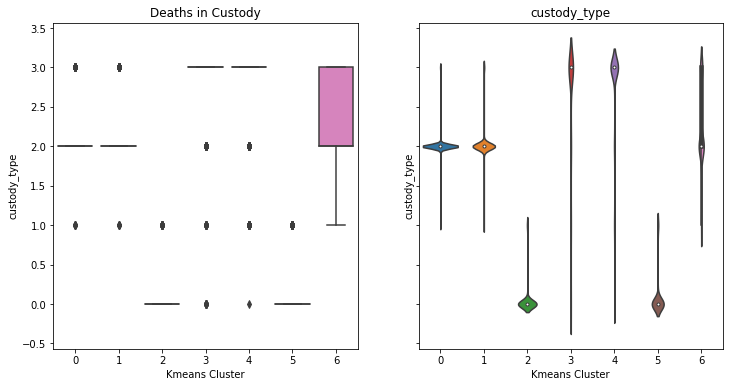

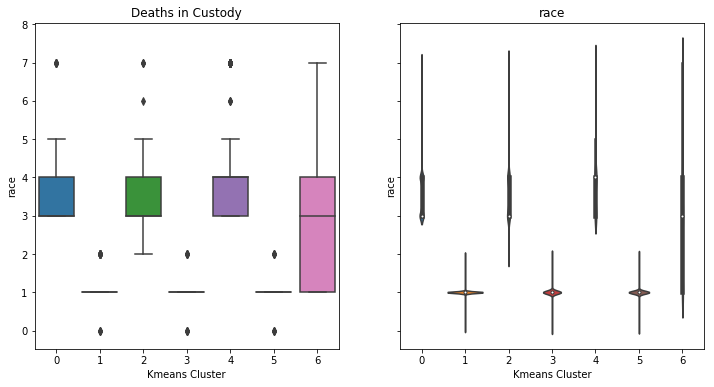

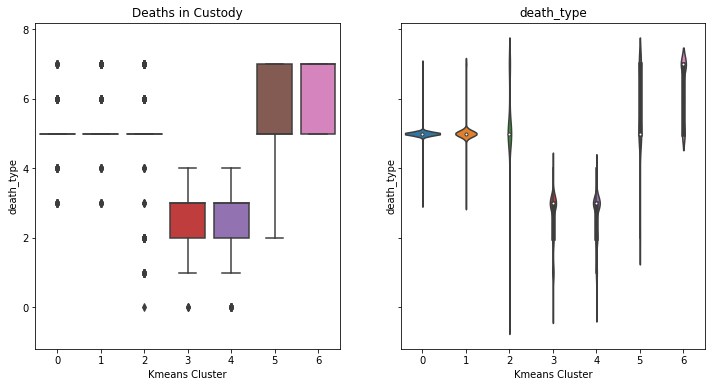

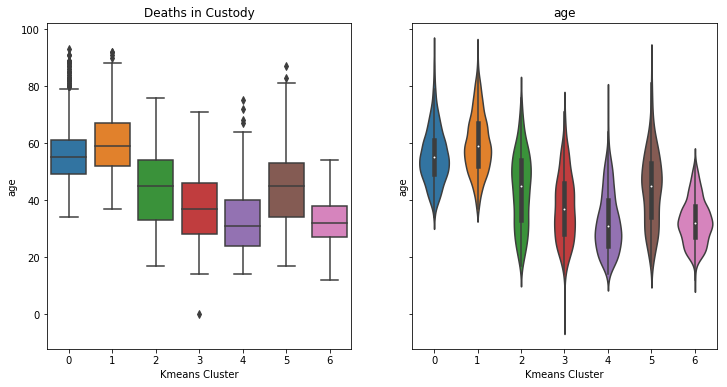

In [39]:
# for each input variable in "Custody" df plot a boxplot and violin plot to get a feel for how distributions differ by cluster
for var in cust.columns[0:4]:
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,6))
    ax1.set_title("Deaths in Custody")
    ax2.set_title(var)
    sns.boxplot(x="Kmeans Cluster", y=var, data=cust, ax=ax1)
    sns.violinplot(x="Kmeans Cluster", y=var, data=cust, ax=ax2)

# Plots of "Officer Involved Shootings" Clusters

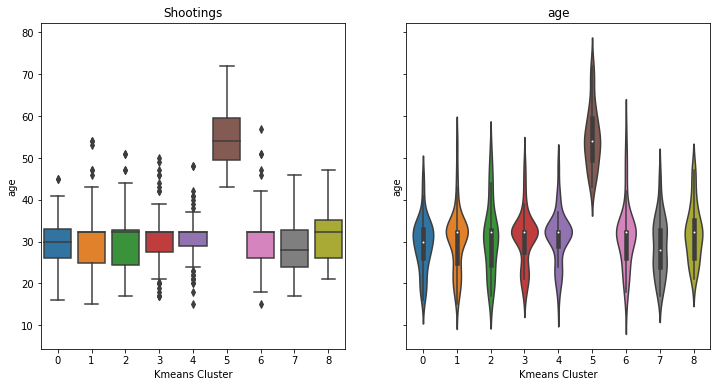

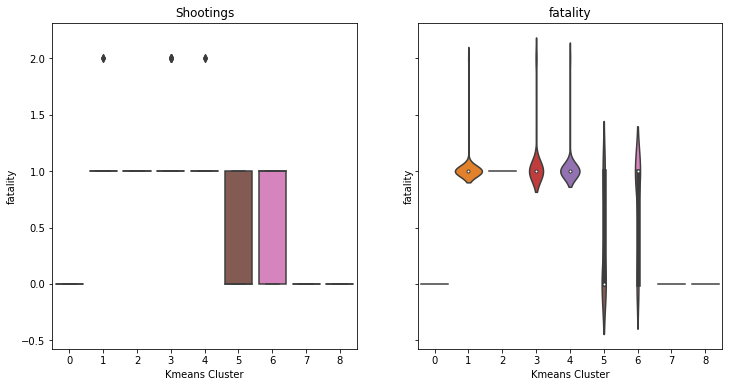

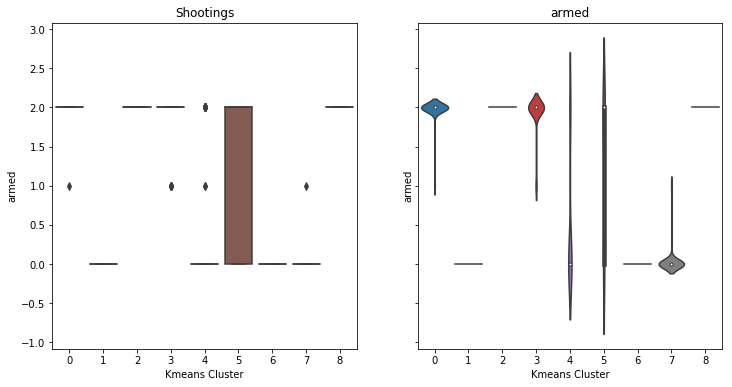

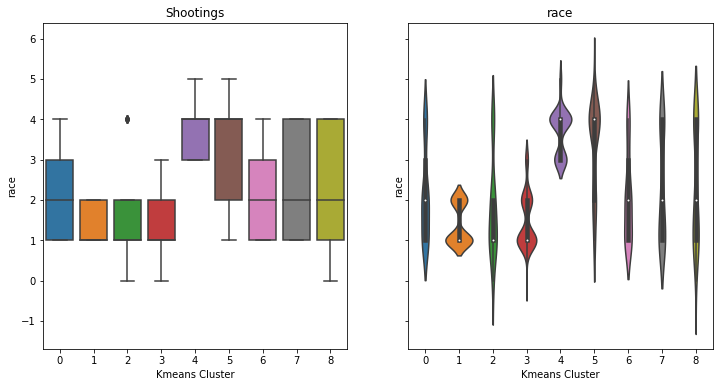

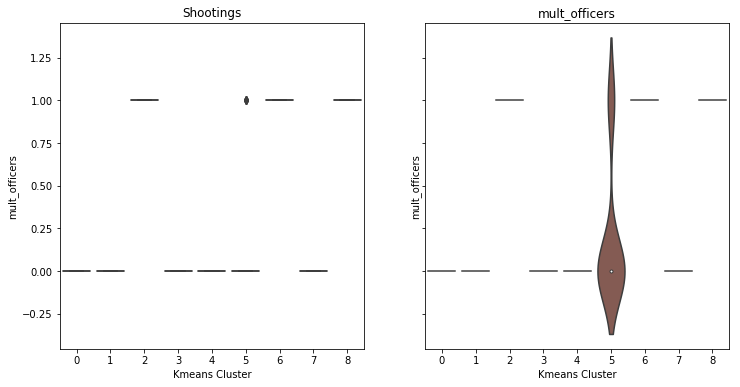

In [40]:
# for each input variable in "Shooting" df plot a boxplot and violin plot to get a feel for how distributions differ by cluster
for var in shoot.columns[0:5]:
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,6))
    ax1.set_title("Shootings")
    ax2.set_title(var)
    sns.boxplot(x="Kmeans Cluster", y=var, data=shoot, ax=ax1)
    sns.violinplot(x="Kmeans Cluster", y=var, data=shoot, ax=ax2)

## Stacked Bar Charts of Categorical Variables

### Deaths in Custody

In [41]:
#Change "custody_type" values back to string values from numeric
cust['custody_type'] = cust['custody_type'].map({0: 'County Jail', 1: 'Municipal Jail', 2: 'Penitentiary', 3:'Police Custody (pre-booking)'})

In [42]:
#Change "race" values back to string values from numeric
cust['race'] = cust['race'].map({0: 'American Indian/Alaska Native', 1: 'Anglo or White', 2: 'Asian', 3:'Black or African American', 4: 'Hispanic or Latino', 5: 'Middle East', 6: 'Native Hawaiian/Pacific Islander', 7: 'Other/Don\'t Know'})

In [43]:
#Change "death_type" values back to string values from numeric
cust['death_type'] = cust['death_type'].map({0: 'Accidental injury caused by others', 1: 'Accidental injury to self', 2: 'Alcohol/Drug Intoxication', 3:'Homicide by Law Enforcement/Correctional Staff', 4: 'Homicide by Other', 5: 'Natural Causes/Illness', 6: 'Other', 7: 'Suicide'})

In [44]:
cust.head()

,custody_type,race,death_type,age,Kmeans Cluster
0,Penitentiary,Hispanic or Latino,Natural Causes/Illness,58.0,0
1,Penitentiary,Black or African American,Natural Causes/Illness,76.0,0
2,Municipal Jail,Hispanic or Latino,Other,30.0,2
3,Penitentiary,Anglo or White,Accidental injury to self,39.0,3
4,Penitentiary,Anglo or White,Natural Causes/Illness,31.0,6


In [45]:
custtype = cust.groupby('Kmeans Cluster')['custody_type'].value_counts()
custtype = custtype.unstack()
custtype = custtype.fillna(0)
custtype = custtype.astype(int)
custtype

custody_type,County Jail,Municipal Jail,Penitentiary,Police Custody (pre-booking)
Kmeans Cluster,,,,
0,0,7,2512,32
1,0,6,1951,70
2,595,22,0,0
3,12,19,39,396
4,1,31,44,713
5,450,37,0,0
6,0,25,537,230


In [46]:
#stacked horizontal bar graph showing Custody Types in each Cluster
data= {'Clusters': list(custtype.index), 'County Jail' : custtype['County Jail'].values, 
       'Municipal Jail': custtype['Municipal Jail'].values,  'Penitentiary':custtype['Penitentiary'].values, 
       'Police Custody (pre-booking)': custtype['Police Custody (pre-booking)'].values}

source = ColumnDataSource(data=data)
color = ['#ff0000', '#3399ff', '#00ff7f', '#ffff00']

g = figure(y_range= data['Clusters'], plot_height=500,plot_width=900, title="Custody Type per Cluster",x_axis_label='Number of Deaths from 2005-2016', y_axis_label= 'Clusters',
           toolbar_location=None, tools="")


g.hbar_stack(custtype.columns, y= 'Clusters', height=0.9, color=color, source=source,
             legend=[value(x) for x in custtype.columns])

g.x_range.start = 0
g.x_range.end = 4000
g.y_range.range_padding = 0.1
g.xgrid.grid_line_color = None
g.axis.minor_tick_line_color = None
g.outline_line_color = None
g.legend.location = "top_right"
g.legend.orientation = "vertical"

show(g)

In [47]:
racedf= cust.groupby('Kmeans Cluster')['race'].value_counts()
racedf = racedf.unstack()
racedf = racedf.fillna(0).astype(int)
racedf

race,American Indian/Alaska Native,Anglo or White,Asian,Black or African American,Hispanic or Latino,Middle East,Native Hawaiian/Pacific Islander,Other/Don't Know
Kmeans Cluster,,,,,,,,
0,0,0,0,1336,1206,2,0,7
1,4,2008,15,0,0,0,0,0
2,0,0,2,327,283,1,1,3
3,5,455,6,0,0,0,0,0
4,0,0,0,326,418,7,3,35
5,4,478,5,0,0,0,0,0
6,0,287,6,285,210,2,1,1


In [48]:
#stacked horizontal bar graph showing Race in each Cluster

data= {'Clusters': list(racedf.index), 'American Indian/Alaska Native' : racedf['American Indian/Alaska Native'].values, 
       'Anglo or White': racedf['Anglo or White'].values,  'Asian':racedf['Asian'].values, 
       'Black or African American': racedf['Black or African American'].values,  
       'Hispanic or Latino': racedf['Hispanic or Latino'].values,
       'Middle East': racedf['Middle East'].values, 'Native Hawaiian/Pacific Islander': racedf['Native Hawaiian/Pacific Islander'].values, 
       'Other/Don\'t Know': racedf['Other/Don\'t Know'].values}

source = ColumnDataSource(data=data)

g = figure(y_range= data['Clusters'], plot_height=500,plot_width=900, title="Racial breakdown of Clusters",x_axis_label='Number of Deaths from 2005-2016', y_axis_label= 'Clusters', toolbar_location=None, tools="")


g.hbar_stack(racedf.columns, y= 'Clusters', height=0.9, color=Spectral8, source=source,
             legend=[value(x) for x in racedf.columns])

g.x_range.start = 0
g.x_range.end = 3000
g.y_range.range_padding = 0.1
g.xgrid.grid_line_color = None
g.axis.minor_tick_line_color = None
g.outline_line_color = None
g.legend.location = "top_right"
g.legend.orientation = "vertical"

show(g)


In [49]:
deathdf = cust.groupby('Kmeans Cluster')['death_type'].value_counts()
deathdf = deathdf.unstack().fillna(0).astype(int)
deathdf

death_type,Accidental injury caused by others,Accidental injury to self,Alcohol/Drug Intoxication,Homicide by Law Enforcement/Correctional Staff,Homicide by Other,Natural Causes/Illness,Other,Suicide
Kmeans Cluster,,,,,,,,
0,0,0,0,15,20,2475,28,13
1,0,0,0,11,11,1912,29,64
2,1,21,35,4,6,397,39,114
3,3,63,73,317,10,0,0,0
4,17,71,149,532,20,0,0,0
5,0,0,27,5,5,240,27,183
6,0,0,0,0,0,242,80,470


In [50]:
#stacked horizontal bar graph showing "Cause of Death" in each Cluster

data= {'Cluster': list(deathdf.index), 'Accidental injury caused by others' : deathdf['Accidental injury caused by others'].values, 
       'Natural Causes/Illness': deathdf['Natural Causes/Illness'].values,  'Other':deathdf['Other'].values, 
       'Accidental injury to self': deathdf['Accidental injury to self'].values,  
       'Homicide by Law Enforcement/Correctional Staff': deathdf['Homicide by Law Enforcement/Correctional Staff'].values,
       'Suicide': deathdf['Suicide'].values, 'Alcohol/Drug Intoxication': deathdf['Alcohol/Drug Intoxication'].values, 
       'Homicide by Other': deathdf['Homicide by Other'].values}

source = ColumnDataSource(data=data)

g = figure(y_range= data['Cluster'], plot_height=500,plot_width=900, title="Manner of Death per Cluster",x_axis_label='Number of Deaths from 2005-2016', y_axis_label= 'Clusters', toolbar_location=None, tools="")


g.hbar_stack(deathdf.columns, y= 'Cluster', height=0.9, color=Spectral8, source=source,
             legend=[value(x) for x in deathdf.columns])

g.x_range.start = 0
g.x_range.end = 4000
g.y_range.range_padding = 0.1
g.xgrid.grid_line_color = None
g.axis.minor_tick_line_color = None
g.outline_line_color = None
g.legend.location = "top_right"
g.legend.orientation = "vertical"

show(g)

### Officer Involved Shootings

In [51]:
#Change "fatality" values back to string values from numeric
shoot['fatality'] = shoot['fatality'].map({0: 'Fatal', 1: 'Not Fatal', 2: 'Unknown'})

In [52]:
#Change "armed" values back to string values from numeric
shoot['armed'] = shoot['armed'].map({0: 'Not Armed', 1: 'Unknown', 2: 'Armed'})

In [53]:
#Change "race" values back to string values from numeric
shoot['race'] = shoot['race'].map({0: 'Asian', 1: 'Black', 2: 'Latino', 3: 'Unknown', 4: 'White', 5: 'Unknown'})

In [54]:
#Change "mult_officers" values back to string values from numeric
shoot['mult_officers'] = shoot['mult_officers'].map({0: 'One Officer', 1: 'Multiple Officers'})

In [55]:
fataldf = shoot.groupby('Kmeans Cluster')['fatality'].value_counts()
fataldf = fataldf.unstack().fillna(0).astype(int)
fataldf

fatality,Fatal,Not Fatal,Unknown
Kmeans Cluster,,,
0,61,0,0
1,0,116,2
2,0,54,0
3,0,120,8
4,0,71,2
5,31,16,0
6,16,43,0
7,56,0,0
8,44,0,0


In [56]:
#stacked horizontal bar graph showing "Fatality" in each Cluster

data= {'Cluster': list(fataldf.index), 'Fatal' : fataldf['Fatal'].values, 
       'Not Fatal': fataldf['Not Fatal'].values,  'Unknown':fataldf['Unknown'].values}

source = ColumnDataSource(data=data)
color = ['#ff0000', '#3399ff', '#00ff7f']


g = figure(y_range= data['Cluster'], plot_height=500,plot_width=900, title="Fatality by Cluster",x_axis_label='Number of Instances', y_axis_label= 'Clusters', toolbar_location=None, tools="")


g.hbar_stack(fataldf.columns, y= 'Cluster', height=0.9, color=color, source=source,
             legend=[value(x) for x in fataldf.columns])

g.x_range.start = 0
g.x_range.end = 150
g.y_range.range_padding = 0.1
g.xgrid.grid_line_color = None
g.axis.minor_tick_line_color = None
g.outline_line_color = None
g.legend.location = "top_right"
g.legend.orientation = "vertical"

show(g)

In [57]:
armeddf = shoot.groupby('Kmeans Cluster')['armed'].value_counts()
armeddf = armeddf.unstack().fillna(0).astype(int)
armeddf

armed,Armed,Not Armed,Unknown
Kmeans Cluster,,,
0,60,0,1
1,0,118,0
2,54,0,0
3,120,0,8
4,16,55,2
5,29,17,1
6,0,59,0
7,0,55,1
8,44,0,0


In [58]:
#stacked horizontal bar graph showing "Armed" in each Cluster

data= {'Cluster': list(armeddf.index), 'Armed' : armeddf['Armed'].values, 
       'Not Armed': armeddf['Not Armed'].values,  'Unknown':armeddf['Unknown'].values}

source = ColumnDataSource(data=data)
color = ['#ff0000', '#3399ff', '#00ff7f']

g = figure(y_range= data['Cluster'], plot_height=500,plot_width=900, title="Subject Armed per Cluster",x_axis_label='Number of Instances', y_axis_label= 'Clusters', toolbar_location=None, tools="")


g.hbar_stack(armeddf.columns, y= 'Cluster', height=0.9, color=color, source=source,
             legend=[value(x) for x in armeddf.columns])

g.x_range.start = 0
g.x_range.end = 150
g.y_range.range_padding = 0.1
g.xgrid.grid_line_color = None
g.axis.minor_tick_line_color = None
g.outline_line_color = None
g.legend.location = "top_right"
g.legend.orientation = "vertical"

show(g)

In [59]:
shrace = shoot.groupby('Kmeans Cluster')['race'].value_counts()
shrace = shrace.unstack().fillna(0).astype(int)
shrace

race,Asian,Black,Latino,Unknown,White
Kmeans Cluster,,,,,
0,0,22,23,3,13
1,0,73,45,0,0
2,4,25,15,0,10
3,1,75,42,10,0
4,0,0,0,28,45
5,0,4,10,1,32
6,0,23,20,6,10
7,0,24,10,3,19
8,1,18,8,0,17


In [60]:
#stacked horizontal bar graph showing "Race" in each Cluster

data= {'Cluster': list(shrace.index), 'Asian' : shrace['Asian'].values, 
       'Black': shrace['Black'].values,  'Latino':shrace['Latino'].values, 'Unknown':shrace['Unknown'].values, 'White':shrace['White'].values}

source = ColumnDataSource(data=data)
color = ['#ff0000', '#3399ff', '#00ff7f', '#ffff00', '#8a2be2']

g = figure(y_range= data['Cluster'], plot_height=500,plot_width=900, title="Racial makeup of Clusters",x_axis_label='Number of Instances', y_axis_label= 'Clusters', toolbar_location=None, tools="")


g.hbar_stack(shrace.columns, y= 'Cluster', height=0.9, color=color, source=source,
             legend=[value(x) for x in shrace.columns])

g.x_range.start = 0
g.x_range.end = 150
g.y_range.range_padding = 0.1
g.xgrid.grid_line_color = None
g.axis.minor_tick_line_color = None
g.outline_line_color = None
g.legend.location = "top_right"
g.legend.orientation = "vertical"

show(g)

In [62]:
multdf = shoot.groupby('Kmeans Cluster')['mult_officers'].value_counts()
multdf = multdf.unstack().fillna(0).astype(int)
multdf

mult_officers,Multiple Officers,One Officer
Kmeans Cluster,,
0,0,61
1,0,118
2,54,0
3,0,128
4,0,73
5,9,38
6,59,0
7,0,56
8,44,0


In [63]:
#stacked horizontal bar graph showing "Multiple Officers" in each Cluster

data= {'Cluster': list(multdf.index), 'Multiple Officers' : multdf['Multiple Officers'].values, 'One Officer': multdf['One Officer'].values}

source = ColumnDataSource(data=data)
color = ['#ff0000', '#3399ff']

g = figure(y_range= data['Cluster'], plot_height=500,plot_width=900, title="Single or Multiple Officers by Cluster",x_axis_label='Number of Instances', y_axis_label= 'Clusters', toolbar_location=None, tools="")


g.hbar_stack(multdf.columns, y= 'Cluster', height=0.9, color=color, source=source,
             legend=[value(x) for x in multdf.columns])

g.x_range.start = 0
g.x_range.end = 200
g.y_range.range_padding = 0.1
g.xgrid.grid_line_color = None
g.axis.minor_tick_line_color = None
g.outline_line_color = None
g.legend.location = "top_right"
g.legend.orientation = "vertical"

show(g)